In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [29]:
file1 = '../PROJECT8/서울_양천구_통합_파일_.csv'

seoul_yang_DF = pd.read_csv(file1)

In [30]:
DF_selected = seoul_yang_DF[['전세가율', '아파트거래현황', '아파트분양물량', '아파트평균매매가격', '순이동인원', '소비자물가지수','지가지수']]

In [31]:
DF_selected

,전세가율,아파트거래현황,아파트분양물량,아파트평균매매가격,순이동인원,소비자물가지수,지가지수
0,48.1,67,0,582373,-154,91.242,71.341
1,48.1,199,0,582127,-93,91.588,71.363
2,47.9,224,0,580794,-105,91.614,71.425
3,47.6,250,0,573216,-106,91.605,71.480
4,48.1,214,0,570520,-167,91.769,71.537
...,...,...,...,...,...,...,...
151,50.3,425,0,1181969,-177,114.540,101.608
152,50.3,286,0,1191915,-142,114.650,101.815
153,50.4,194,0,1198279,-117,114.690,102.025
154,50.4,165,0,1202895,-99,114.400,102.255


In [32]:
corr_matrix = DF_selected.corr()

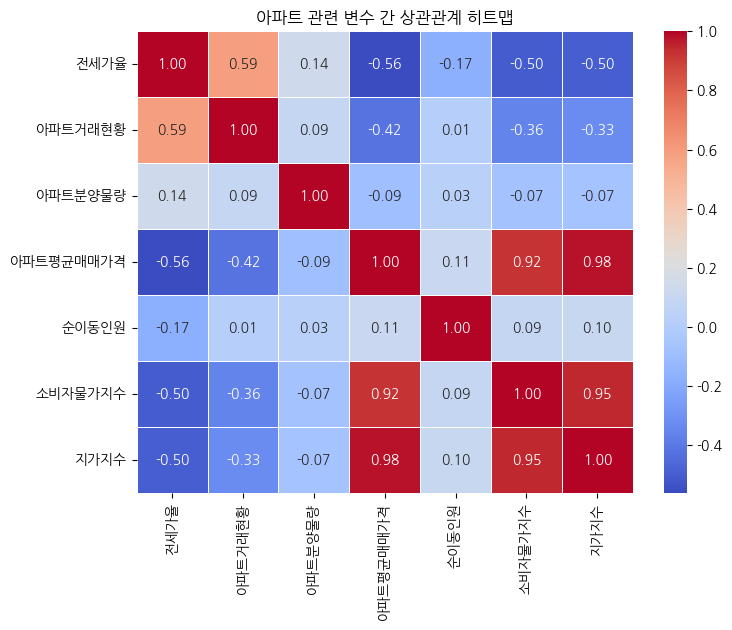

In [33]:
# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("아파트 관련 변수 간 상관관계 히트맵")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = seoul_yang_DF[['전세가율']]
y = seoul_yang_DF['아파트평균매매가격']

# 데이터 분할 (예시)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 (max_depth 값을 조정)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)  # max_depth=10으로 설정

# 모델 훈련
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 27222628448.4522
R^2 Score: 0.537526384919531
